In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
%config NotebookApp.iopub_msg_rate_limit=10000

In [2]:
df_1 = pd.read_csv('star.csv')
df_1.head(20)

,Unnamed: 0,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
6,8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
7,9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232
8,10,1.237680e+18,328.092076,18.220310,25.77163,22.52042,20.63884,19.78071,19.05765,8102,301,3,27,5.652162e+18,GALAXY,0.459596,5020,55852,525
9,11,1.237662e+18,243.986637,25.738280,23.76761,23.79969,20.98318,19.80745,19.45579,3927,301,4,112,5.322364e+18,GALAXY,0.591409,4727,55693,855


<Axes: xlabel='i', ylabel='r'>

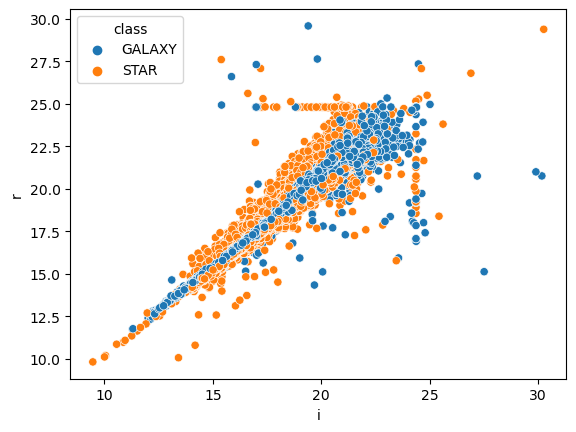

In [3]:
#best for seperating galaxy from star
sns.scatterplot(data=df_1, x='i', y='r', hue='class')

In [4]:
df = df_1[['i','r','class']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81039 entries, 0 to 81038
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       81039 non-null  float64
 1   r       81039 non-null  float64
 2   class   81039 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.9+ MB


In [5]:
x = df.drop(["class"], axis=1)
y = df.drop(["i", "r"], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [62]:
def knn(dfX, dfY, k, unknown):
    allDistances = pd.DataFrame(columns=['distance', 'class'])
    for i in range(len(dfX)):
        distance = (((dfX.loc[i, 'i'] - unknown['i']) ** 2) + ((dfX.loc[i, 'r'] - unknown['r']) ** 2)) ** 0.5
        locDF = {'distance': [distance], 'class': [dfY.loc[i, 'class']]}
        locDF = pd.DataFrame(locDF)
        allDistances = pd.concat([allDistances, locDF], ignore_index=True)       
        percentDone = round(((i+1)/len(dfX))*100,2)
        clear_output(wait=True)
        print(str(percentDone) + "% done")
    allDistances.sort_values('distance').reset_index(drop=True)
    kNearest = allDistances.loc[0:k-1]
    galaxyCount = 0
    starCount = 0
    for i in range(len(kNearest)):
        #print(str(kNearest.iloc[i]))
        if kNearest.loc[i, 'class'] == 'STAR':
            starCount += 1
        else:
            galaxyCount += 1
    if starCount > galaxyCount:
        return 'STAR'
    else:
        return 'GALAXY'

In [63]:
knn(x, y, 9, X_test.iloc[40399])

100.0% done


'GALAXY'

In [34]:
y_test.iloc[40399]

class    STAR
Name: 40399, dtype: object

In [35]:
X_test.iloc[40399]

i    17.20395
r    24.80172
Name: 40399, dtype: float64

In [64]:
unknown = pd.read_csv('unknownObservation.csv')

In [66]:
unknown

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.240000e+18,45.488289,3.008271,23.99093,21.79186,21.19933,20.13753,20.34898,4576,301,3,62,6.710000e+18,?,0.439836,6999,56181,493


In [65]:
knn(x, y, 9, unknown)

100.0% done


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().